<a href="https://colab.research.google.com/github/purvimalviya5/EDAReport/blob/main/EDAReportCrimesOnWomen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Crimes On Women Data Interpretation (EDA)

Importing necessary libraries

In [ ]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CrimesOnWomenData.csv to CrimesOnWomenData (2).csv


Loading the Dataset

In [ ]:
df = pd.read_csv('CrimesOnWomenData.csv')

In [ ]:
df.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV',
       'WT'],
      dtype='object')

In [ ]:
headers = np.array(df.columns)
print(headers)

['Unnamed: 0' 'State' 'Year' 'Rape' 'K&A' 'DD' 'AoW' 'AoM' 'DV' 'WT']


Keeping required columns

In [ ]:
wanted_columns = ['Year', 'Rape', 'K&A', 'DD','AoW','AoM','DV','WT']
selected_features = [column in wanted_columns for column in df.columns]

In [ ]:
newdf = df.loc[:, selected_features]

In [ ]:
newdf.head()

,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,2001,871,765,420,3544,2271,5791,7
1,2001,33,55,0,78,3,11,0
2,2001,817,1070,59,850,4,1248,0
3,2001,888,518,859,562,21,1558,83
4,2001,959,171,70,1763,161,840,0


In [ ]:
newdf.shape

(736, 8)

In [ ]:
headers = np.array(newdf.columns)

In [ ]:
headers

array(['Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT'],
      dtype=object)

Checking for Null Values and DataTypes of the variables

In [ ]:
print(newdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    736 non-null    int64
 1   Rape    736 non-null    int64
 2   K&A     736 non-null    int64
 3   DD      736 non-null    int64
 4   AoW     736 non-null    int64
 5   AoM     736 non-null    int64
 6   DV      736 non-null    int64
 7   WT      736 non-null    int64
dtypes: int64(8)
memory usage: 46.1 KB
None


Mean and Standard Deviation of Data

In [ ]:
# Compute mean and standard deviation of data

mean = np.array(np.mean(newdf,axis=0))
std = np.array(np.std(newdf,axis=0))

In [ ]:
print(mean)
print(std)

[2011.14945652  727.85597826 1134.54211957  215.69293478 1579.11548913
  332.72282609 2595.07880435   28.74456522]
[   6.04933968  976.36097928 1992.18206259  424.63856211 2462.28806172
  805.47679427 4039.2580927    79.94529361]


Visualizing Piechart (Frequency Distribution of variables)

In [ ]:
#Create a function which add all the particular columns on the basis of same year

def helper1(all_cases):
    for i in list(df.columns)[2:]:
        all_cases[i] = df.groupby(['Year'])[i].sum()

    return all_cases

In [ ]:
all_cases = pd.DataFrame()
all_cases = helper1(all_cases)
all_cases.pop('Year')
all_cases

,Rape,K&A,DD,AoW,AoM,DV,WT
Year,,,,,,,
2001,15694,13681,6738,33622,9656,49032,114
2002,15970,13613,6687,33497,10027,49102,76
2003,15357,12499,6078,32450,12220,49492,46
2004,17682,14697,6900,33966,9871,56867,89
2005,17701,14644,6673,33413,9759,56995,148
2006,18725,16348,7481,35899,9822,61400,67
2007,20139,19249,7955,37866,10783,74143,61
2008,21001,21803,8043,39802,12084,79957,67
2009,20928,24086,8242,38159,10891,88263,48


import plotyly for piechart

In [ ]:
import plotly.express as px

In [ ]:
fig = px.pie(pd.DataFrame(all_cases.sum(axis=0),columns=['Count']),
             values='Count',
             names=pd.DataFrame(all_cases.sum(axis=0)).index,
             title='Percentage of Each Crime during 2001 - 2021'
            )

fig.show()

Total Number of crimes

sum of all death along the column attributes

In [ ]:
pd.DataFrame(all_cases.sum(axis=0), columns=["Total no of crimes"])

,Total no of crimes
Rape,535702
K&A,835023
DD,158750
AoW,1162229
AoM,244884
DV,1909978
WT,21156


In [ ]:
fig = px.bar(all_cases, x=all_cases.index, y='Rape', title='Year wise rape case count', color_discrete_sequence=['red'])

fig.show()

This bar chart illustrates the year-wise count of rape cases from 2001 to 2021,showing increase over time.The peak is observed in 2016 with 38.94k reported cases.

In [ ]:
fig = px.bar(all_cases, x=all_cases.index, y='K&A', title='Year wise dowry deaths case count', color_discrete_sequence=['blue'])

fig.show()

This bar chart shows the year-wise count of domestic violence cases(WT) from 2001 to 2021.The data reveals a noticeable spike in cases around 2010-2015 followed by a gradual decline toward 2020.

In [ ]:
fig = px.bar(all_cases, x=all_cases.index, y='DD', title='Year wise domestic violence case count', color_discrete_sequence=['indigo'])

fig.show()

In [ ]:
fig = px.bar(all_cases, x=all_cases.index, y='AoW', title='Year wise importation case count', color_discrete_sequence=['lightblue'])

fig.show()

In [ ]:
fig = px.bar(all_cases, x=all_cases.index, y='AoM', title='Year wise domestic violence case count', color_discrete_sequence=['Yellow'])

fig.show()

In [ ]:
fig = px.bar(all_cases, x=all_cases.index, y='DV', title='Year wise domestic violence case count', color_discrete_sequence=['green'])

fig.show()

In [ ]:
fig = px.bar(all_cases, x=all_cases.index, y='WT', title='Year wise domestic violence case count', color_discrete_sequence=['black'])

fig.show()

Normalization

In normalization all the numerical dataset convert into range(-3,3)

In [ ]:
#df_norm = (df-np.mean(df, axis = 0))/np.std(df, axis = 0)

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Normalize only numeric columns
df_norm = (numeric_cols - np.mean(numeric_cols, axis=0)) / np.std(numeric_cols, axis=0)

# If you want to keep non-numeric columns intact and combine them back with the normalized data:
non_numeric_cols = df.select_dtypes(exclude=[np.number])
df_combined = pd.concat([df_norm, non_numeric_cols], axis=1)

print(df_combined.head())


   Unnamed: 0      Year      Rape       K&A        DD       AoW       AoM  \
0   -1.729699 -1.677779  0.146610 -0.185496  0.481132  0.797991  2.406372   
1   -1.724992 -1.677779 -0.711679 -0.541889 -0.507945 -0.609643 -0.409351   
2   -1.720286 -1.677779  0.091302 -0.032398 -0.369003 -0.296113 -0.408110   
3   -1.715579 -1.677779  0.164021 -0.309481  1.514952 -0.413077 -0.387004   
4   -1.710872 -1.677779  0.236740 -0.483662 -0.343099  0.074680 -0.213194   

         DV        WT              State  
0  0.791215 -0.271993     ANDHRA PRADESH  
1 -0.639741 -0.359553  ARUNACHAL PRADESH  
2 -0.333497 -0.359553              ASSAM  
3 -0.256750  0.678657              BIHAR  
4 -0.434505 -0.359553       CHHATTISGARH  


In [ ]:
# Visualise the linearity of independent and dependent variables using scatter plots
'''Create subplots in 2 row and 3 columns'''
def show_linearity_subplots_for(df):
    fig, ax = plt.subplots(1,3)
    fig.set_figheight(5)
    fig.set_figwidth(20)
    fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
    plt1 = plt.subplot(1,3,1)
    plt2 = plt.subplot(1,3,2)
    plt3 = plt.subplot(1,3,3)

    plt1.scatter(df[df.columns[1]], df[df.columns[0]])
    plt1.set_xlabel(df.columns[1])
    plt1.set_ylabel(df.columns[0])
    plt1.grid(axis='both', alpha=.25)

    plt2.scatter(df[df.columns[2]], df[df.columns[0]])
    plt2.set_xlabel(df.columns[2])
    plt2.set_ylabel(df.columns[0])
    plt2.grid(axis='both', alpha=.25)

    plt3.scatter(df[df.columns[3]], df[df.columns[0]])
    plt3.set_xlabel(df.columns[3])
    plt3.set_ylabel(df.columns[0])
    plt3.grid(axis='both', alpha=.25)

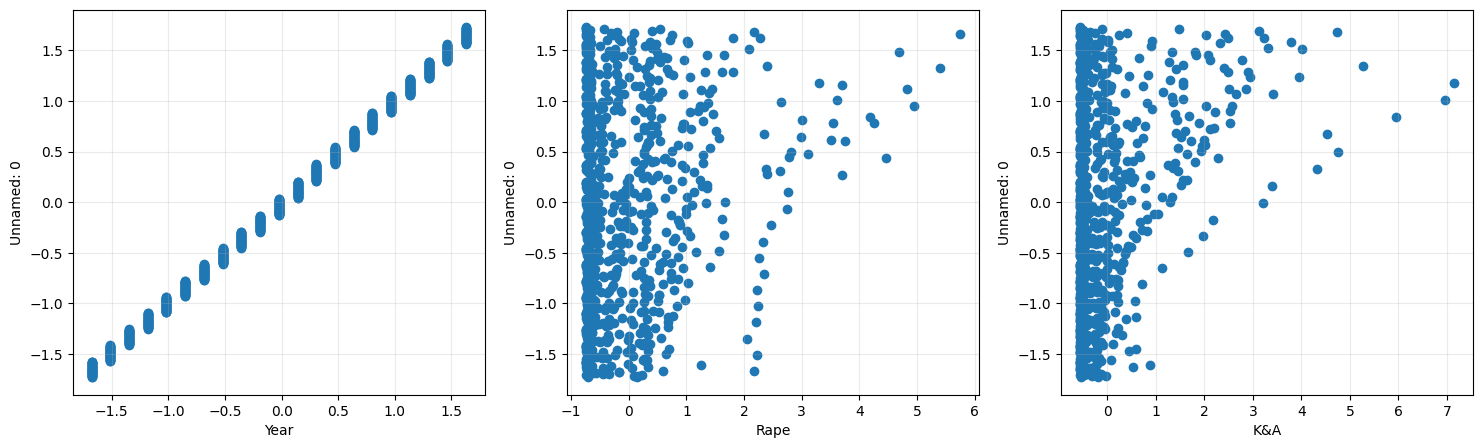

In [ ]:
show_linearity_subplots_for(df_norm)

Generation of heat map for correlation analysis

<Axes: >

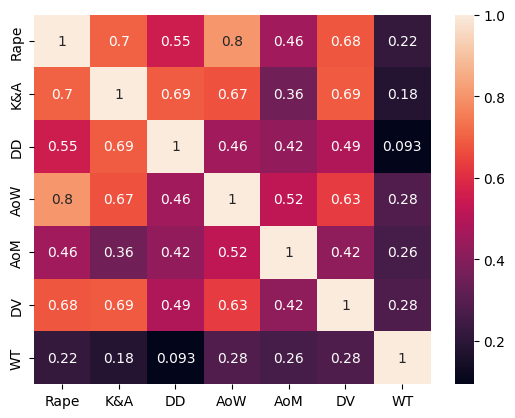

In [ ]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Now create the heatmap
sns.heatmap(df_numeric.corr(), annot=True)